In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

<h2>Defining Problem Statement and Analysing basic metrics</h2>

<h3>we have to do customer profiling using bar, countplot etc and conditional and marginal probabilities along with their impact on the business(conditional and marginal probability are calculated using the pandas crosstab method)</h3>

In [2]:
Aerofit_data = pd.read_csv('aerofit_treadmill.txt',sep=',')

In [3]:
Aerofit_data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


<h3>From the below cell we can see that except Product, Gender and MaritalStatus(which are string datatype) are int data type in the future cells we will be converting categorical varibles such as Gender and MaritalStatus in to categories using replace method in pandas</h3>

<h3>from the below cell we see that their are no missing data in the dataset</h3>

In [4]:
Aerofit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


<h3>from the shape of data it is clear that it contains the data of 180 individuals and 9 features are considered while preparing the data set
</h3>

In [5]:
Aerofit_data.shape

(180, 9)

<h3>form the below table it is clear that their are 3 unique products present</h3>

In [6]:
Aerofit_data['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [7]:
Aerofit_data['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42],
      dtype=int64)

In [8]:
Aerofit_data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

<h3>The columns present in the dataset are listed below </h3>

In [9]:
Aerofit_data.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

<h3>The education qualification varies from 14 years to 21 years</h3>

In [10]:
Aerofit_data['Education'].unique()

array([14, 15, 12, 13, 16, 18, 20, 21], dtype=int64)

In [11]:
Aerofit_data['MaritalStatus'].unique()

array(['Single', 'Partnered'], dtype=object)

In [12]:
Aerofit_data['Usage'].unique()

array([3, 2, 4, 5, 6, 7], dtype=int64)

In [13]:
Aerofit_data['Fitness'].unique()

array([4, 3, 2, 1, 5], dtype=int64)

<h3>Their are 107 partners and 73 unmarried people partisipated in the survey</h3>

In [14]:
Aerofit_data['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

<h2>Stastical Analysis</h2>

<h3>Most number of people in the age group of 26(median) are buying the fitness products</h3>
<h3>most people use fitness machines 3 times a week</h3>
    <h3>average fitness people are using the fitness products the most</h3>
    <h3>Fitness products are most purchased by the Income group USD 50596.50 </h3>
    <h3>Most of the people run for 94 miles a week
</h3>

In [15]:
Aerofit_data.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


<h3>the product KP281 is most frequent one which appears 80 times </h3>
<h3>male are mostly using the fitness machines</h3>
<h3>partners are using the more than the unmarried people</h3>

In [16]:
Aerofit_data.describe(include='object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [17]:
Aerofit_data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

<h3>converting both Gender and maritalStatus features to category using the dictionary inside replace method</h3>

In [18]:
replace_cat = {'Gender':{'Male':0,'Female':1},
               'MaritalStatus':{'Partnered':1,'Single':0}}

In [19]:
Aerofit_data = Aerofit_data.replace(replace_cat)

<h3>0 being Male and 1 being Female</h3>

In [20]:
Aerofit_data['Gender'].unique()

array([0, 1], dtype=int64)

<h3>0 being single and 1 being married</h3>

In [21]:
Aerofit_data['MaritalStatus'].unique()

array([0, 1], dtype=int64)

<h3>dataset after the categorical varible to category</h3>

In [22]:
Aerofit_data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,0,14,0,3,4,29562,112
1,KP281,19,0,15,0,2,3,31836,75
2,KP281,19,1,14,1,4,3,30699,66
3,KP281,19,0,12,0,3,3,32973,85
4,KP281,20,0,13,1,4,2,35247,47


In [23]:
Aerofit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    int64 
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    int64 
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 12.8+ KB


<h3>we can see that the dataset does not contain any missing values</h3>

In [24]:
Aerofit_data.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

<h3>below is the distplot with and without kde</h3>
<h3>from the value_counts and kde and distplot it is clear that most number of people are using for 85 to 95 miles a week</h3>

In [39]:
Aerofit_data['Miles'].value_counts()[:5]

85    27
95    12
66    10
75    10
47     9
Name: Miles, dtype: int64

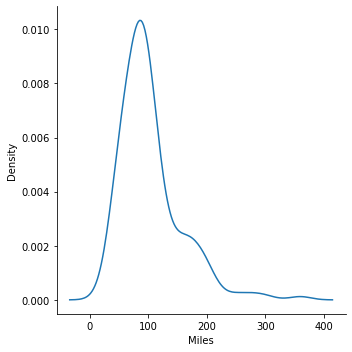

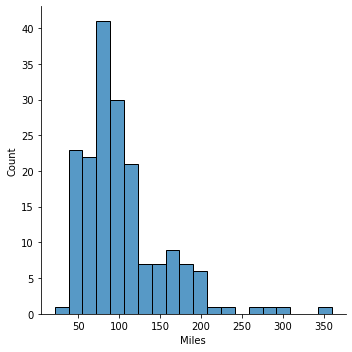

In [25]:
ax = sns.displot(Aerofit_data['Miles'],kind='kde')
bx = sns.displot(Aerofit_data['Miles'])
plt.show()

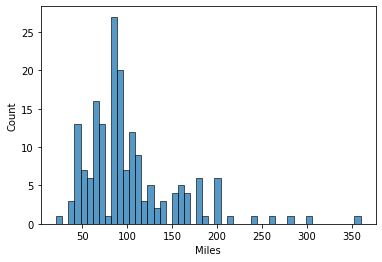

In [26]:
ax = sns.histplot(Aerofit_data['Miles'],bins=50)
plt.show()

<h3>we can see that most of the prople are buying the inexpensive product KP281</h3>

In [27]:
Aerofit_data.groupby('Product')['Gender'].count()

Product
KP281    80
KP481    60
KP781    40
Name: Gender, dtype: int64

<h3>Male are buying the fitnes product more than Female</h3>

In [43]:
Aerofit_data.groupby('Gender')['Product'].count()

Gender
0    104
1     76
Name: Product, dtype: int64

<h3>The product KP281 is bought by the Male age group of 26 the most and Female age group 27 the most</h3>
<h3>The producct KP481 is bought by Male age group of 25 the most and Female age group 29 the most</h3>
<h3>The product KP781 is bought by Male age group of 27 the emost and Female age group 26 the most </h3>
<h3>outliers are present in the female age group above 45 who brought the product KP281 and the male age group above 40 who brought the product KP781</h3>

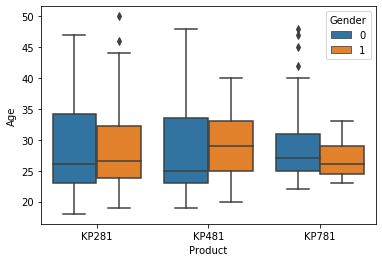

In [28]:
ax = sns.boxplot(x=Aerofit_data['Product'],y=Aerofit_data['Age'],hue=Aerofit_data['Gender'])
plt.show()

<h3>The most expensive product(KP781) is bought by high income group of both Male and Female</h3>
<h3>The less expensive product(KP281) is bought by low income group of both Male and Female</h3>
<h3>outliers are present in the female whoes income above USD 65000 and income below USD 35000 </h3>

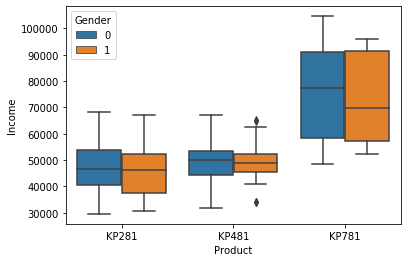

In [46]:
ax = sns.boxplot(x=Aerofit_data['Product'],y=Aerofit_data['Income'],hue=Aerofit_data['Gender'])
plt.show()

<h3>The least expensive product(KP281) is bought by most people and the most expensive product(KP781) is brought the least number oof people </h3>

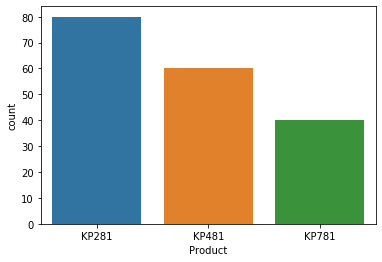

In [29]:
ax = sns.countplot(x='Product',data=Aerofit_data)
plt.show()

<h3>The most expensive product(KP781) is bought by the Male most</h3>

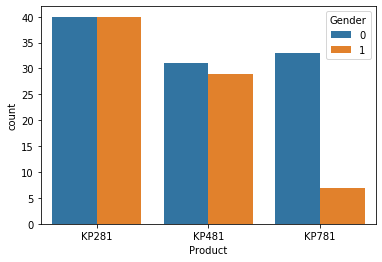

In [30]:
ax = sns.countplot(x='Product',hue='Gender',data=Aerofit_data)
plt.show()

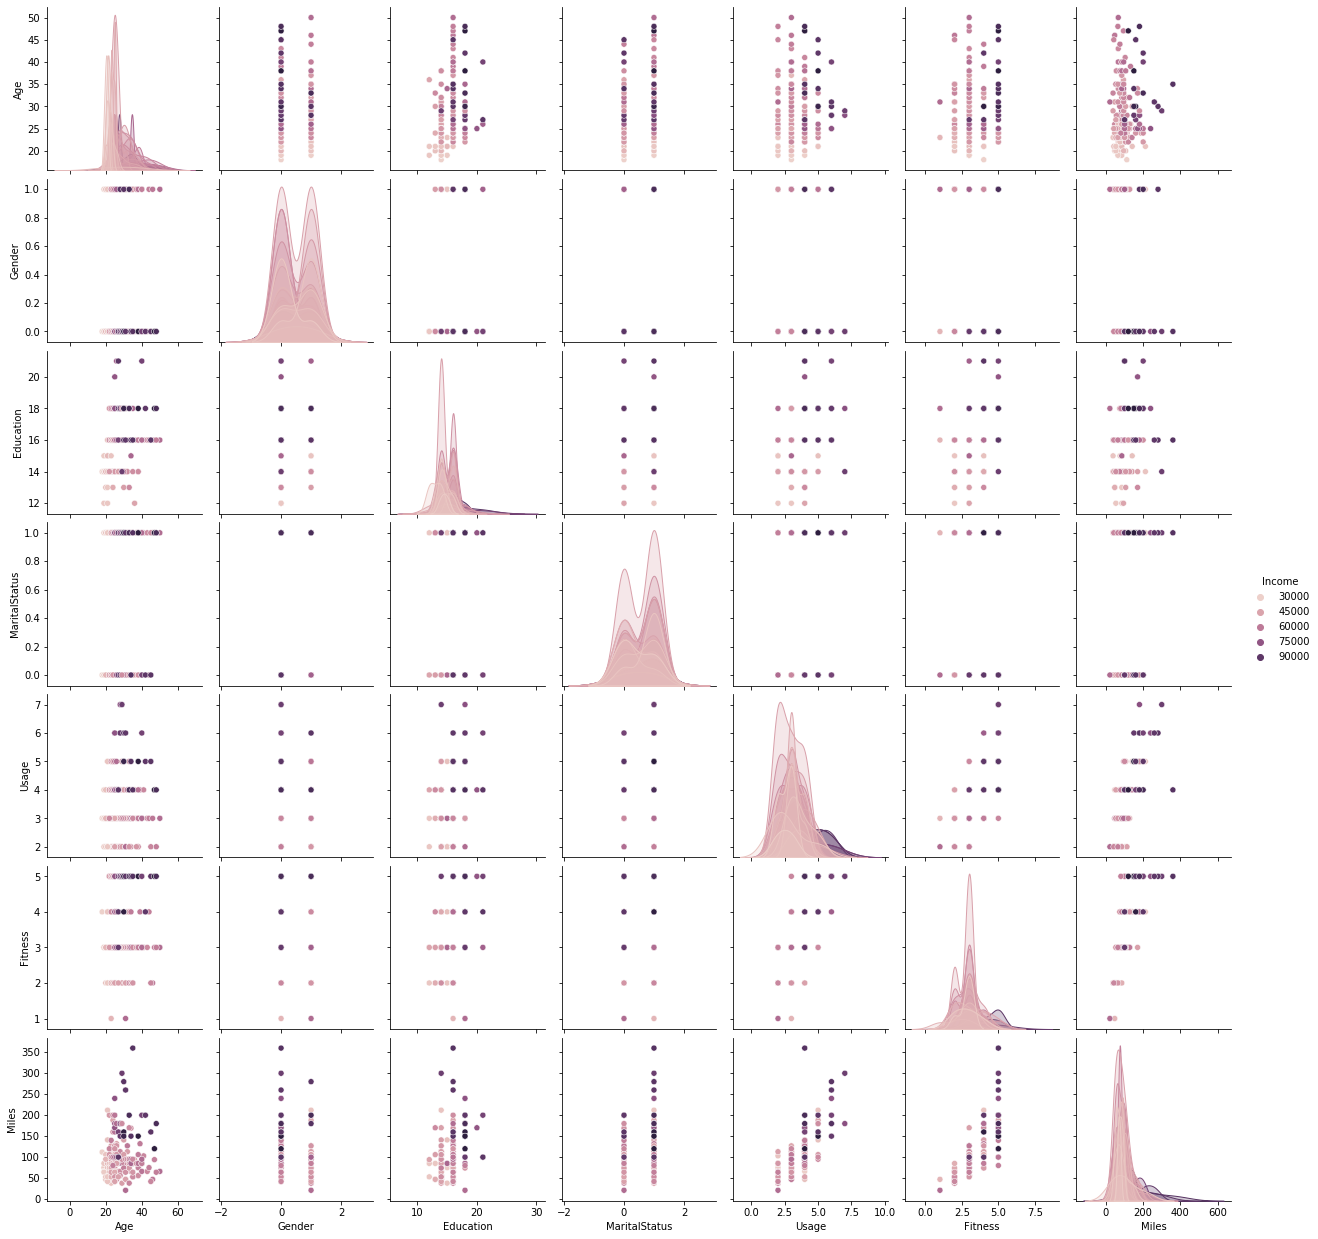

In [31]:
ax = sns.pairplot(Aerofit_data,hue='Income')
plt.show()

<h3>from the below we ca see the corelation of the features among themself</h3>
<h3>Miles and Fitness are most corelated followed by Miles and Usage </h3>

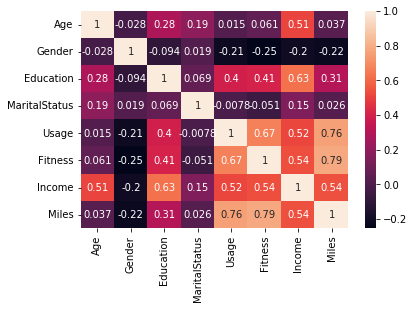

In [32]:
ax = sns.heatmap(Aerofit_data[['Age','Gender','Education','MaritalStatus','Usage','Fitness','Income','Miles']].corr(),annot=True)
plt.show()

<h3>The most expensive product(KP781) is bought by Male mostly </h3>

In [33]:
pd.crosstab(Aerofit_data['Product'],Aerofit_data['Gender'],margins=True,normalize=True)

Gender,0,1,All
Product,,,
KP281,0.222222,0.222222,0.444444
KP481,0.172222,0.161111,0.333333
KP781,0.183333,0.038889,0.222222
All,0.577778,0.422222,1.000000


<h3>calculative the marginal probability in order find the conditional probability</h3>

In [34]:
joint_probability = pd.crosstab(Aerofit_data['Product'],Aerofit_data['Gender'],normalize=True)
joint_probability

Gender,0,1
Product,,
KP281,0.222222,0.222222
KP481,0.172222,0.161111
KP781,0.183333,0.038889


In [35]:
product = joint_probability.sum(axis=1)
product

Product
KP281    0.444444
KP481    0.333333
KP781    0.222222
dtype: float64

<h3>calculative the conditional probability using marginal probability and divide method</h3>

In [36]:
conditional_probability = joint_probability.divide(product,axis=0)
conditional_probability

Gender,0,1
Product,,
KP281,0.500000,0.500000
KP481,0.516667,0.483333
KP781,0.825000,0.175000


<h2>recomendation</h2>

<h3>most expensive product was brought by more income group</h3>
<h3>most expensive product was brought by the male more than the female</h3>
<h3>the least expensive product was brought by most people</h3>
<h3>most fitness products brought by the age group between 25 to 30</h3>
<h3>most people are using the fitness products 94 kms per week</h3>
<h3>most of the fitness users are average users using 3 times a week</h3>
<h3> married people are using the fitness products the most</h3>

https://drive.google.com/file/d/1_nxzumjN5e7feY7sEgSWtuLGp_Mmzm7E/view?usp=sharing